# Assignment 5 - Intro to Python, Pandas

### This assignment has 7 questions. The total mark is 10.
### Please hand in your jupyter notebook only.

### Deadline is 11.59pm Monday 16 Feb 2020 



In [3]:
# Question 1 (1 point): Load the necessary library (1 point)

# We will import the pandas library to access a python database library.
# Additionally we are import the matplotlib.pypolt library to access a python graphing library.
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Question 2 (1 point): Load CAvideos.csv into a Pandas DataFrame (1 pojnt)
# List all column names

# Loading the csv into our notebook, using pandas' read_csv script
videos = pd.read_csv('CAvideos.csv')

# List all column names
print(videos.columns)


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


In [5]:
# Question 3 (3 point): Show the total number of null values per column/feature in the dataset.
# Do we need to do any imputation? If we need to do imputation, what can we do?

# Calculate the total number of null values per column
videos.isna().sum(axis='rows')

# It looks like there are 1296 rows with missing descriptions. Since descriptions are strings, I would suggest that we do not need to do any imputations. However if one chooses you could remove these rows from the dataset, or set the descriptions to blank or fill them in with a sting such as.
# videos.fillna("NEED MORE INFORMATION")


video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

In [13]:
# Question 4 (3 points): Show datatypes of values in each column and the  “summary statistics” of the DataFrame 
# How many rows are there in the data?

# Data Type of each column.
print('Video Types \n', videos.dtypes,'\n')

# Summary statistics of the DataFrame
print('Summary Statistics \n',videos.describe(),'\n')

# NUMBER OF ROWS in the data
print('Number or Rows in the DataFrame is: ', len(videos))


Video Types 
 video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object 

Summary Statistics 
         category_id         views         likes      dislikes  comment_count
count  40881.000000  4.088100e+04  4.088100e+04  4.088100e+04   4.088100e+04
mean      20.795553  1.147036e+06  3.958269e+04  2.009195e+03   5.042975e+03
std        6.775054  3.390913e+06  1.326895e+05  1.900837e+04   2.157902e+04
min        1.000000  7.330000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       20.000000  1.439020e+05  2

In [86]:
# Question 5 (4 points): Show the most viewed channel (the total views per channel)?
# Show the most commented channel (the total comments per channel)?
# Hint: use groupby 

# Grouping viewed channel
grouped_Viewed_Channel  = videos[['title','channel_title','views']].groupby(by=['channel_title'])['views'].sum().reset_index()
# Sorting the most view channels TOP 100
print('Top 20 most views channels \n',grouped_Viewed_Channel.sort_values('views',ascending = False).head(20) ,'\n')

# Grouping most commented channel TOP 100
grouped_Comment_Channel = videos[['title','channel_title','comment_count']].groupby(by=['channel_title'], sort=True)['comment_count'].min().reset_index()
print('Top 20 most commeneted channel \n', grouped_Comment_Channel.sort_values('comment_count',ascending = False).head(20))


Top 20 most views channels 
                     channel_title       views
2422         Marvel Entertainment  1011420205
3607                     T-Series   799114025
1101                 Dude Perfect   729916338
4404            YouTube Spotlight   635976769
4606                      ibighit   511567918
2954                    PewDiePie   461700524
3497  Sony Pictures Entertainment   451188760
3518                Speed Records   426604974
21               20th Century Fox   419577035
746           ChildishGambinoVEVO   411775069
4141           Universal Pictures   389777414
1150                   Ed Sheeran   385566686
1374                 FoxStarHindi   380299683
3711              TaylorSwiftVEVO   374678625
2338               MLG Highlights   349687769
4283        Warner Bros. Pictures   334634298
1175                   EminemVEVO   326643776
588                 BuzzFeedVideo   320822878
1035                 Disney•Pixar   311335874
47                5-Minute Crafts   300739307 

Top

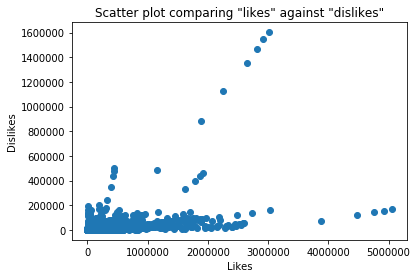

In [6]:
# Question 6 (4 points): Plot a feature named ‘likes’ against a second feature ‘dislikes’ from a DataFrame with a scatter or line plot. 
plt.scatter(videos['likes'],videos['dislikes'])
plt.title('Scatter plot comparing "likes" against "dislikes"')
plt.xlabel('Likes')
plt.ylabel('Dislikes')
plt.show()
# It seems to show that the more people like a video, the less people dislike the video and vise-versa. However, there seems to be a few contentious videos.


In [22]:
# Question 7 (4 points) Create new columns that have likes/dislikes ratio and comment/views ratio values.
# Plot the scatterplot between like and like/dislike ratio in log-log scales? Hint: plt.xscale('log'), plt.yscale('log') 
# Is there any particular pattern?

# Create new columns
likeDislike = videos['likes']/videos['dislikes']
commentView = videos['comment_count']/videos['views']

# Addings new columns with older columns
new_df = pd.concat([videos,likeDislike,commentView],axis =1)

# Renaming new columns
new_df.rename({0:'likePerDislike',1:'Comment_countPerView'}, axis = 'columns')


16116   
18     Rooster Teeth|"RT"|"animation"|"television"|"f...    308568    19541   
19     sharry mann|"sharry mann new song"|"sharry man...   1096327    33966   
20     5 Ice Cream Gadgets|"Ice Cream"|"Cream Sandwic...    817732    23663   
21     rhett and link|"gmm"|"good mythical morning"|"...    343168    10172   
22     smart girl|"girl"|"how to"|"smart girl shows"|...   3905245    53072   
23     Jake|"Paul"|"logan"|"paul"|"its"|"every"|"day"...   4204818   187890   
24     80s music|"80s songs"|"madonna"|"DO COLLEGE KI...    549374    16832   
25     wrestling|"ufc"|"mma"|"nigahiga"|"youtube"|"ww...    348841    27089   
26     Industrial Fan|"Industrial Fan Destruction"|"T...    370827    12150   
27     dessin animé|"disney"|"top 10"|"top 5"|"top10"...    653398    27773   
28     PhillyD|"Philly D"|"Vloggity"|"The Philip DeFr...     92280    11045   
29     Telefoon|"Babbu Maan"|"Mehfil Mitran Di"|"new ...    178447     4339   
...                                                  ...       ...      ...   
40851  BuzzFeed|"BuzzFeedBlue"|"Worth it"|"men try"|"...   1615246    29693   
40852  TéléMaroc|"télémaroc"|"تيلي ماروك"|"telemaroc"...    266267     5534   
40853  acer predator|"acer predator 21x"|"predator 21...    950727    38129   
40854  VH1|"celebrity"|"pop culture"|"VH+1"|"reality ...     94667     5428   
40855  almay|"summer makeuo"|"date night makeup"|"bro...     42908     2757   
40856  olivia sui|"olivia"|"first time story time"|"f...    109662     7056   
40857  amrit maan new song|"amrit maan songs"|"amrit ...  16256855   321798   
40858  lebron james|"lebron"|"james"|"lonzo ball"|"lo...    436795     4758   
40859  tv shows|"iranian series"|"serial jadid irani"...    617135     3438   
40860  مسلسلات رمضان 2018|"مسلسلات سي بي سي دراما"|"م...   1780097    11288   
40861  espn|"espn live"|"boston celtics"|"kyrie irvin...    812832     7701   
40862  matrix|"action"|"action comedy"|"funny"|"best ...    345870    36481   
40863  Korean kpop reaction|"dkdktv"|"Kpop reaction"|...    191974    19681   
40864  Halo Infinite|"Halo E3"|"Halo Infinite Trailer...   2557709    65412   
40865  Destiny|"Destiny 2"|"Activision"|"Forsaken"|"B...   1392609    38471   
40866  al oula|"al aoula tv"|"al aoula 2018"|"الاولى"...    293765     4722   
40867  Hawaii volcano update|"Hawaii volcano"|"United...    104279      718   
40868  HTC U12|"HTC"|"U12"|"U12+U12 Plus"|"HTC U12+"|...    793685    30147   
40869  australian|"blogger"|"vlogger"|"blog"|"vlog"|"...    168717    16278   
40870  actor|"actors"|"actor demands"|"ridiculous act...    362153     5568   
40871  wild|"minecraft ocelot"|"ocelot minecraft"|"ad...    182184     9710   
40872  NCT|"엔시티"|"NCT 2018"|"미니게임천국"|"천러"|"쿤"|"제노"|"텐...    261128    32078   
40873  game|"games"|"video game"|"gaming"|"gameplay"|...    774509    10250   
40874  Karunesh Talwar|"AIB"|"Abhishek Upmanyu"|"Canv...    505968    28369   
40875  поединок|"михеев"|"полный контакт"|"вечер с вл...    201847     1568   
40876  annoying orange|"funny"|"fruit"|"talking"|"ani...     80685     1701   
40877  hkayet tounsia|"elhiwar ettounsi"|"denya okhra...    103339      460   
40878  Kingdom Hearts|"KH3"|"Kingdom Hearts 3"|"Froze...    773347    25900   
40879  180612__TB02SorryExcuse|"News"|"Politics"|"The...    115225     2115   
40880  吳宗憲|"吳姍儒"|"小明星大跟班"|"Sandy"|"Jacky wu"|"憲哥"|"中天...    107392      300   

       dislikes  comment_count  \
0         43420         125882   
1          1688          13030   
2          5339           8181   
3          1989          17518   
4         21082          85067   
5          4613          12143   
6          9850          26629   
7          2967          15959   
8          4123          36391   
9           976           1484   
10         8585          28976   
11         2285           3312   
12           30            186   
13         7134           8063   
14          668           5335   
15         1697           4277   
16          621

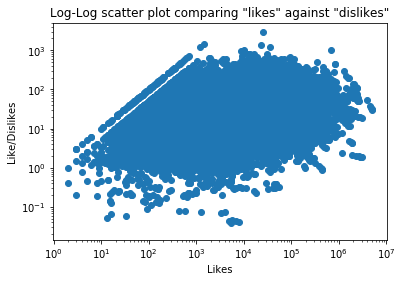

In [26]:
# Plotting
plt.figure()
plt.scatter(new_df['likes'],likeDislike)
plt.xscale('log')
plt.yscale('log')
plt.autoscale(True)

plt.title('Log-Log scatter plot comparing "likes" against "dislikes"')
plt.xlabel('Likes')
plt.ylabel('Like/Dislikes')
plt.show()

# Is there any pattern?
# There does not seem to be a discernable pattern, however, there seems to be less spread (few outliers).
